<a href="https://colab.research.google.com/github/AVICII-24/Exo-planet_Detect_SEDSCelestia/blob/main/Exoplanet_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from sklearn.preprocessing import normalize

# import the dataset
data_train = pd.read_csv('/content/exoTrain.csv')
data_test = pd.read_csv('/content/exoTest.csv')

#Checking to see label distribution
if 'LABEL' in data_train.columns:
    # Count the occurrences of 1 and 2 in the 'label' column
    count_1 = (data_train['LABEL'] == 1).sum()
    count_2 = (data_train['LABEL'] == 2).sum()

    print(f"Number of times 1 appears in the 'label' column: {count_1}")
    print(f"Number of times 2 appears in the 'label' column: {count_2}")
'''For Our Reference:'''
#Number of times 1 appears in the 'label' column: 5050
#Number of times 2 appears in the 'label' column: 37
'''
also remember:
1: not an exoplanet
2: is an exoplanet
'''



<ipython-input-1-ca5b91486161>:14: DtypeWarning: Columns (163) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('/content/exoTrain.csv')


Number of times 1 appears in the 'label' column: 3906
Number of times 2 appears in the 'label' column: 37


'\nalso remember:\n1: not an exoplanet\n2: is an exoplanet\n'

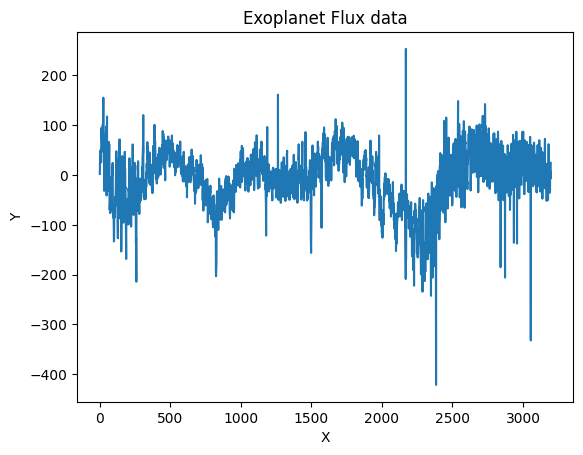

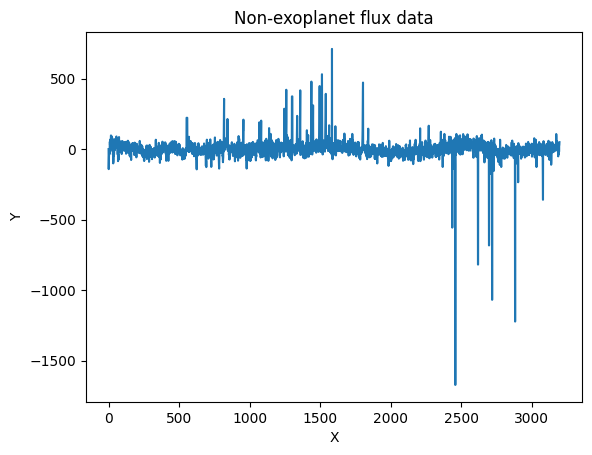

In [15]:
#Plotting the exoplanet curve (Label=2)
for k, row in data_train.iterrows():
        if row['LABEL'] == 2:
          x=row
y=np.arange(0,3198)
 # Plotting the Graph
plt.plot(y, x)

plt.title("Exoplanet Flux data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#Plotting the non-exoplanet curve (Label=1)
for k, row in data_train.iterrows():
        if row['LABEL'] == 1:
          x_1=row
          break

y_1=np.arange(0,3198)
 # Plotting the Graph
plt.plot(y_1, x_1)
plt.title("Non-exoplanet flux data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
#Run this cell only if you want to generate a 500 record csv file. [seperate from the rest of the code]
#Currently im underscaling the usable dataset, only going to be using about 500 values in total, 37 (LABEL=2)*3 and rest(389) as random LABEL=1's
import csv

# Open the new CSV file for writing
with open("/content/500size_dataset_exoplanet.csv", 'w', newline='') as f1:
    writer = csv.writer(f1)
    writer.writerow(data_train.columns)
    num_1s, num_2s = 389, 37
    for _, row in data_train.iterrows():
        if row['LABEL'] == 1 and num_1s > 0:
            writer.writerow(row)
            num_1s -= 1
        elif row['LABEL'] == 2 and num_2s > 0:
            for _ in range(3):  # Oversampling positive indicators by 3 times
                writer.writerow(row)
            num_2s -= 1

        if num_1s == 0 and num_2s == 0:
            break

print("500-size dataset CSV file created successfully!")


500-size dataset CSV file created successfully!


In [ ]:
'''New data_train_500 specified on the basis of the new file'''
data_train_500 = pd.read_csv('/content/500size_dataset_exoplanet.csv')

#permute the dataset
data_train_500 = np.random.permutation(np.asarray(data_train_500))
data_test = np.random.permutation(np.asarray(data_test))


#Now we have normalised 500 datapoints for training, and the entire testing dataset(we can even shorten the testing data set to reduce runtime...)
#REDUCED THE Y VALUES BACAUSE SIGMOID ONLY CONVERGES TO 1 OR 0 (LABELS WERE 1 AND 2)
X_train=data_train_500[:,1:]
Y_train=data_train_500[:,0]-1

X_test=data_test[:,1:]
Y_test=data_test[:,0]-1

# Normalize only the feature columns
X_train_norm = normalize(X_train, axis=1)
X_test_norm = normalize(X_test, axis=1)

#Y colums do not need to be normlized


In [ ]:
# Model Definition
model = tf.keras.Sequential()

model.add(layers.Conv1D(filters=64, kernel_size=8, activation='relu', input_shape=(3198,1)))
model.add(layers.MaxPool1D(pool_size=2, strides=5))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(filters=128, kernel_size=6, activation='relu'))
model.add(layers.MaxPool1D(pool_size=2, strides=5))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(filters=256, kernel_size=4, activation='relu'))
model.add(layers.MaxPool1D(pool_size=2, strides=5))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model with Validation Split
model.fit(X_train,Y_train,epochs=14,batch_size=16,validation_split=0.2,verbose=1)

# Evaluate the Model on Test Data
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.6908 - loss: 2.4531 - val_accuracy: 0.7900 - val_loss: 15.7432
Epoch 2/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.7120 - loss: 2.1747 - val_accuracy: 0.8000 - val_loss: 4.9285
Epoch 3/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.7788 - loss: 0.6321 - val_accuracy: 0.8500 - val_loss: 4.6186
Epoch 4/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.8314 - loss: 0.5431 - val_accuracy: 0.7100 - val_loss: 1.2323
Epoch 5/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.8594 - loss: 0.3465 - val_accuracy: 0.8500 - val_loss: 1.4587
Epoch 6/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.9038 - loss: 0.2976 - val_accuracy: 0.8700 - val_loss: 0.7977
Epoch 7/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9130 - loss: 0.2043 - val_accuracy: 0.8700 - val_loss: 0.5534
Epoch 8/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.9739 - loss: 0.0666 - val_accuracy: 